In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import pandas as pd
import math
import scipy.stats
from IPython.display import HTML
import tqdm
%matplotlib inline

from algorithms import LLM

import warnings
warnings.filterwarnings('ignore')

In [52]:
dataset_name = "mushroom"
time_interval = 1000

dataset_file = './dataset/'+ dataset_name + '.dat'
itemset_file = './dataset/'+ dataset_name + '.dat_itemsets'

X = []
with open(dataset_file) as f:
    for line in f:
        xi = line.split()
        xi_int = [ int(xij)  for xij in xi ]
        xi_int.sort()

        X.append(tuple(xi_int))


def get_B_from(filename):
    B = []
    with open(filename) as f:
        for line in f:
            phi = line.split()
            phi_int = [int(x) for x in phi]
            phi_int.sort()
            B.append(tuple(phi_int))
    if () in B:  # ignore "bottom" {()} 
        B.remove(())
    return B

B = get_B_from(itemset_file)

S = list(dict.fromkeys(X + B + [()]))


llm = LLM(B,S)
llm.fit(X, n_iter=time_interval, solver="check_two_dimesion_converge")

0   0.0030476016105209
1   0.0030475301461754
2   0.0030474352073779
3   0.0030473169565075
4   0.0030471756284155
5   0.0030470115013418
6   0.0030468248930868
7   0.0030466161592255
8   0.0030463856926167
9   0.0030461339225321
10   0.0030458613142883
11   0.0030455683673801
12   0.0030452556141584
13   0.0030449236199572
14   0.0030445729801833
15   0.0030442043193956
16   0.0030438182908659
17   0.0030434155731343
18   0.0030429968692316
19   0.0030425629055423
20   0.0030421144291575
21   0.0030416522063215
22   0.0030411770210512
23   0.0030406896721610
24   0.0030401909729392
25   0.0030396817476408
26   0.0030391628306894
27   0.0030386350642236
28   0.0030380992962494
29   0.0030375563785413
30   0.0030370071649654
31   0.0030364525095753
32   0.0030358932642139
33   0.0030353302770175
34   0.0030347643911210
35   0.0030341964411869
36   0.0030336272534980
37   0.0030330576430416
38   0.0030324884121378
39   0.0030319203492304
40   0.0030313542262859
41   0.0030307907980928
42

In [53]:
llm.param_value_list

[{(59, 85): 5.726980725404352e-06, (85, 90): 0.010841209471565576},
 {(59, 85): 1.4484746729902744e-05, (85, 90): 0.010870246443532952},
 {(59, 85): 2.6161349833310692e-05, (85, 90): 0.01090884443205843},
 {(59, 85): 4.074545326650124e-05, (85, 90): 0.010956983466166501},
 {(59, 85): 5.822329263113532e-05, (85, 90): 0.011014620864356112},
 {(59, 85): 7.857938251312996e-05, (85, 90): 0.011081705571873386},
 {(59, 85): 0.00010179653732218142, (85, 90): 0.011158180018722671},
 {(59, 85): 0.00012785582268475356, (85, 90): 0.011243980418113293},
 {(59, 85): 0.00015673651652480452, (85, 90): 0.01133903680307646},
 {(59, 85): 0.0001884160867237963, (85, 90): 0.01144327303948213},
 {(59, 85): 0.00022287018221250473, (85, 90): 0.01155660679090452},
 {(59, 85): 0.00026007263402727244, (85, 90): 0.01167894955984845},
 {(59, 85): 0.00029999546369203676, (85, 90): 0.011810206728915053},
 {(59, 85): 0.00034260889722781277, (85, 90): 0.011950277595723436},
 {(59, 85): 0.00038788138348490856, (85, 90)

In [54]:
def calculate_KL(value1, value2):
    key1, key2 = llm.parameters
    llm.theta_[key1] = value1
    llm.theta_[key2] = value2
    llm.compute_theta_perp()
    llm.compute_P()
    return llm.compute_KL()

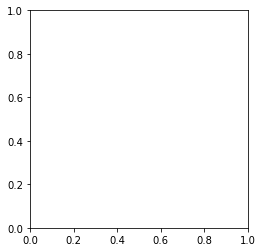

In [55]:
#グラフ関係の設定
key1, key2 = llm.parameters
max_x_range= max([param_value[key1] for param_value in llm.param_value_list])
min_x_range = min([param_value[key1] for param_value in llm.param_value_list])
max_y_range = max([param_value[key2] for param_value in llm.param_value_list])
min_y_range = min([param_value[key2] for param_value in llm.param_value_list])
interval_point=60
fig = plt.figure()
ax = fig.add_subplot(111, aspect=1)
x = np.linspace(-min_x_range, max_x_range, interval_point)
y = np.linspace(-min_y_range, max_y_range, interval_point).reshape(-1, 1)
KL_list = []
for x_element in x:
    KL_element = []
    for y_element in y:
        KL_element.append(calculate_KL(x_element, y_element))
    KL_list.append(KL_element)
KL_numpy = np.array(KL_list).squeeze()

(0.004825408356302689, 0.0049747454078216706)

In [56]:
def update(z):
    ax.cla() # ax をクリア
    ax.set_xlim(min_x_range, max_x_range)
    ax.set_ylim(min_y_range, max_y_range)
    ax.pcolormesh(x,y,KL_numpy,cmap="bwr", alpha=0.5)
    ax.plot(llm.param_value_list[z][key1],llm.param_value_list[z][key2], "o", c="yellow", label="LLM")
anim = FuncAnimation(fig, update, frames=time_interval, interval=200)

anim.save("c03.gif", writer="imagemagick")
plt.close()
HTML(anim.to_jshtml())

MovieWriter imagemagick unavailable; using Pillow instead.
